This criterion is linked to a Learning Outcome Project Organization

· A README file with summary of findings and link to notebook

· Jupyter notebook with headings and text appropriately formatted

· No unnecessary files

· Directories and files have appropriate names and location


ReadMe:
The objective of the below analysis is to identify the features that influence the price of a car. The original dataset contained information on 3 million used cars. The considered dataset contains information on 426K cars to ensure speed of processing.

Following analysis was performed. 
1. uploading the data and performing EDA 
2. identifying cells with NaN and appropriately managing the data by removing null values
3. splitting the data into X (contributors) and y (target) dataset
4. Using JamesSteinEncoder category encode for converting descriptive data into equivalent numerical data 
5. performed Linear regression, polynomial regression. 
6. Plotting the data for EDA 
7. performing KMean method for cross validation 
8. performing PCA to plot the data 
9. establish optimal number of clusters for PCA 

Syntax and Code Quality

· Libraries are imported and aliased correctly

· Code does not contain errors

· No long strings of code output

· Demonstrates competency with pandas

· Demonstrates competency with seaborn

· Comments are used appropriately to explain code

· Variables are sensible

In [278]:
import pandas as pd
import numpy as np 
import seaborn as sns
from category_encoders.helmert import HelmertEncoder
from category_encoders.james_stein import JamesSteinEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


In [10]:
df = pd.read_csv('/Users/jetindersingh/Documents/GitHub/Berk_AI_ML/practical_application_II_starter/data/vehicles.csv')

In [11]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [13]:
'''df = df.drop(columns=['VIN', 'id'], axis= 1)
df[['transmission','cylinders', 'type', 'fuel']] = df[['transmission', 'cylinders', 'type','fuel']].fillna('other')
df[['condition','size','drive', 'manufacturer', 'title_status', 'model']] = df[['condition', 'size', 'drive', 'manufacturer', 'title_status', 'model']].fillna('unknown')
df['paint_color'] = df['paint_color'].fillna('custom')
#df['odometer'] = df['odometer'].fillna(0)'''

"df = df.drop(columns=['VIN', 'id'], axis= 1)\ndf[['transmission','cylinders', 'type', 'fuel']] = df[['transmission', 'cylinders', 'type','fuel']].fillna('other')\ndf[['condition','size','drive', 'manufacturer', 'title_status', 'model']] = df[['condition', 'size', 'drive', 'manufacturer', 'title_status', 'model']].fillna('unknown')\ndf['paint_color'] = df['paint_color'].fillna('custom')\n#df['odometer'] = df['odometer'].fillna(0)"

In [94]:
df = df.dropna()
df.reset_index()
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al,5.0
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al,4.0
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al,5.0
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,21.0
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy,7.0
426792,7303114896,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy,9.0
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy,5.0
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy,26.0


In [95]:
(df.isnull()).sum().sort_values()

id              0
paint_color     0
type            0
size            0
drive           0
VIN             0
transmission    0
title_status    0
state           0
odometer        0
cylinders       0
condition       0
model           0
manufacturer    0
year            0
price           0
region          0
fuel            0
age             0
dtype: int64

In [236]:
df.reset_index()
#df.drop(columns= ['level_0'], axis= 1)
df1 = df.reset_index()
df1 = df1.drop(columns= ['index', 'id'], axis = 1)
df1

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
0,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al,5.0
1,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al,4.0
2,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al,5.0
3,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,21.0
4,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34863,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy,7.0
34864,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy,9.0
34865,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy,5.0
34866,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy,26.0


In [239]:
df1.corr()

/var/folders/n6/3wwzwvcs3gb87szxh3j04ync0000gn/T/ipykernel_95238/473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,price,year,odometer,age
price,1.000000,0.254059,-0.199988,-0.254059
year,0.254059,1.000000,-0.219942,-1.000000
odometer,-0.199988,-0.219942,1.000000,0.219942
age,-0.254059,-1.000000,0.219942,1.000000


In [240]:
#df.columns.values.tolist()
#df2 = df[['region', 'manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','size','type','paint_color','state']]
df2 = df.drop(columns=['price', 'year', 'odometer', 'id'])
df3 = df[['price', 'year', 'odometer']]
#print(df1)
#print(df2)

Visualizations

· Appropriate plots for categorical and continuous variables are utilized

· Plots contain human readable labels

· Plots contain descriptive titles

· Axes are legible

· Subplots are used when appropriate

· Plots are scaled appropriately for readability

/var/folders/n6/3wwzwvcs3gb87szxh3j04ync0000gn/T/ipykernel_95238/3892137505.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot= True)


<AxesSubplot: >

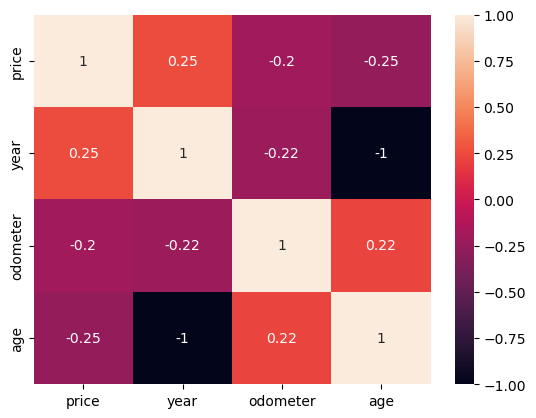

In [241]:
sns.heatmap(df1.corr(), annot= True)

In [242]:
df1.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
0,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al,5.0
1,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al,4.0
2,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al,5.0
3,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,21.0
4,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,28.0


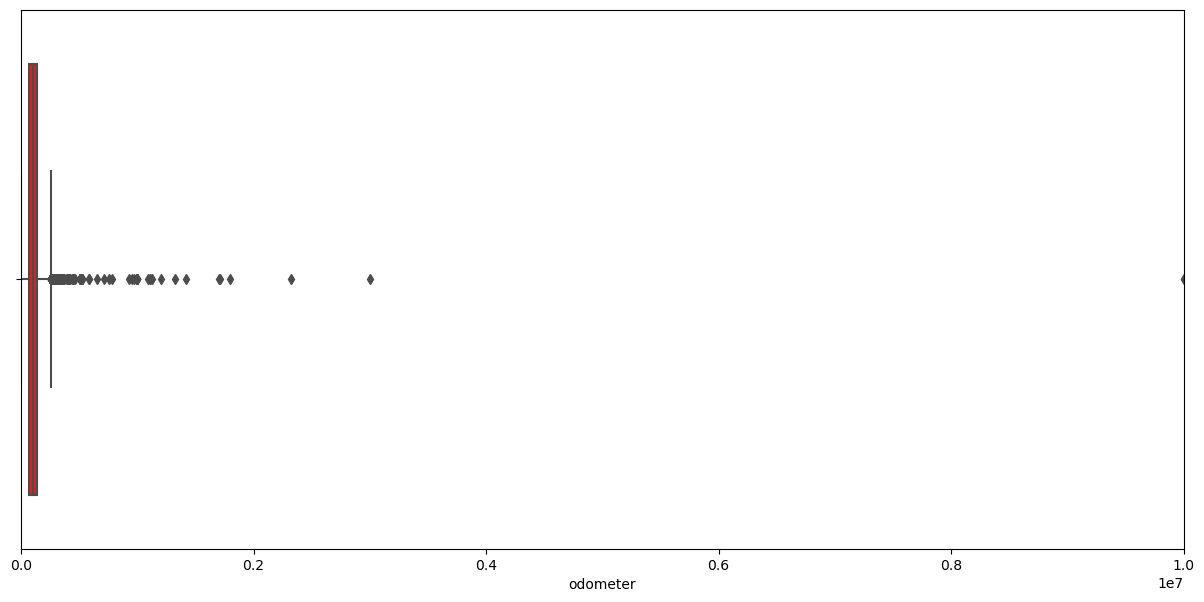

In [243]:
plt.figure(figsize= (15,7))
sns.boxplot(x= df1['odometer'],color= 'r')
plt.xlim(0,10_000_000)
plt.show()

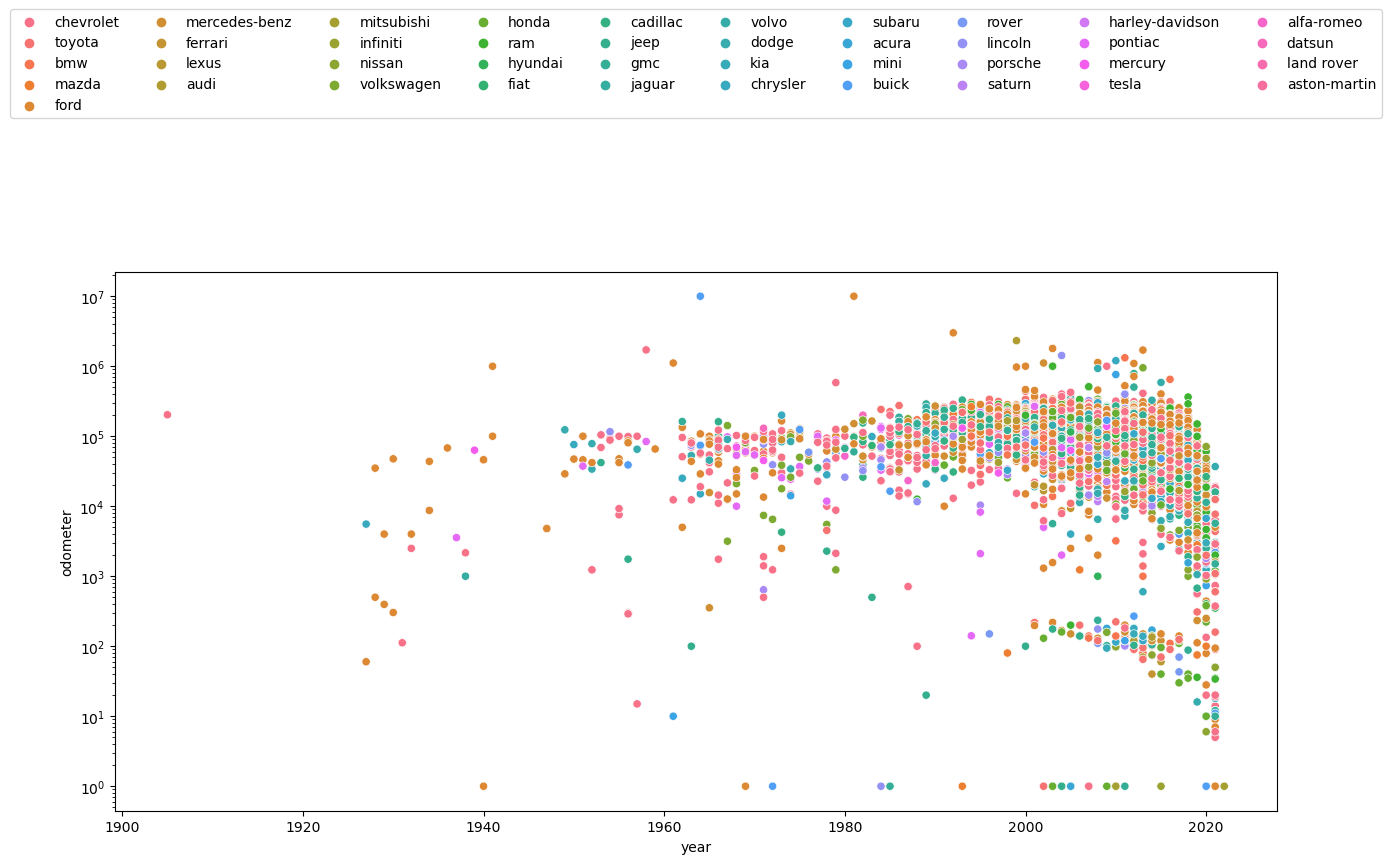

In [244]:
plt.figure(figsize= (15,7))
sns.scatterplot(data = df1, x= 'year', y = 'odometer',hue='manufacturer')
plt.yscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),ncol=10)

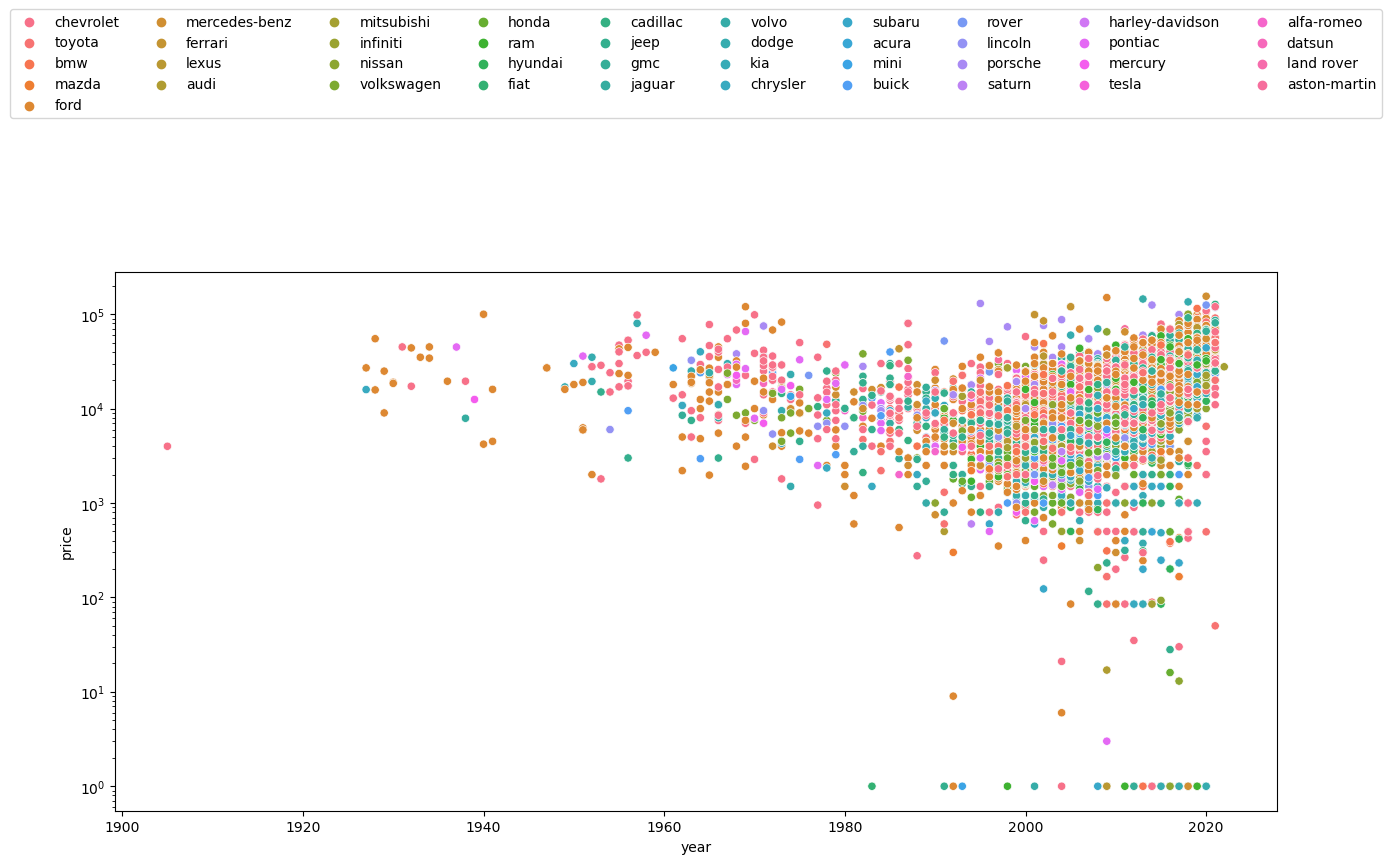

In [245]:
plt.figure(figsize= (15,7))
sns.scatterplot(data = df, x= 'year', y = 'price', hue='manufacturer')
plt.ylim()
plt.yscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),ncol=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'chevrolet'),
  Text(1, 0, 'toyota'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'mazda'),
  Text(4, 0, 'ford'),
  Text(5, 0, 'mercedes-benz'),
  Text(6, 0, 'ferrari'),
  Text(7, 0, 'lexus'),
  Text(8, 0, 'audi'),
  Text(9, 0, 'mitsubishi'),
  Text(10, 0, 'infiniti'),
  Text(11, 0, 'nissan'),
  Text(12, 0, 'volkswagen'),
  Text(13, 0, 'honda'),
  Text(14, 0, 'ram'),
  Text(15, 0, 'hyundai'),
  Text(16, 0, 'fiat'),
  Text(17, 0, 'cadillac'),
  Text(18, 0, 'jeep'),
  Text(19, 0, 'gmc'),
  Text(20, 0, 'jaguar'),
  Text(21, 0, 'volvo'),
  Text(22, 0, 'dodge'),
  Text(23, 0, 'kia'),
  Text(24, 0, 'chrysler'),
  Text(25, 0, 'subaru'),
  Text(26, 0, 'acura'),
  Text(27, 0, 'mini'),
  Text(28, 0, 'buick'),
  Text(29, 0, 'rover'),
  Text(30, 0, 'lincoln'),
  Text(31, 0, 'porsche'),
  Text(32, 0, 'saturn'

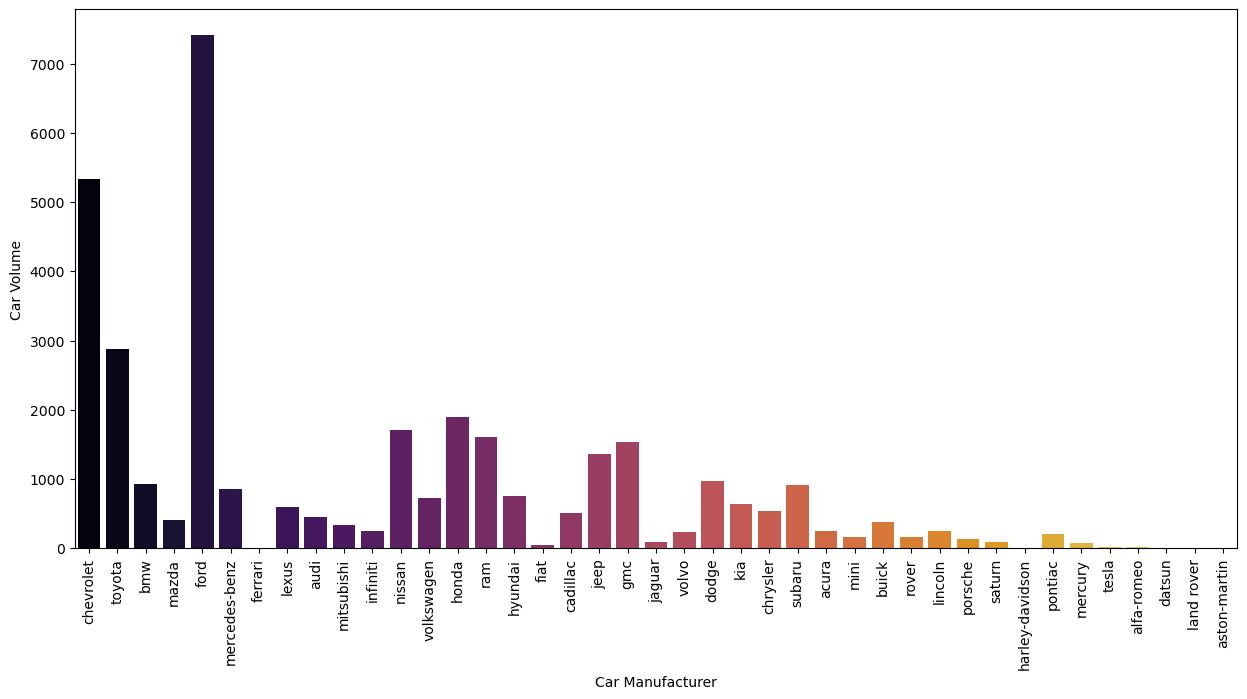

In [246]:
plt.figure(figsize= (15,7))
sns.countplot(x= df['manufacturer'], data= df, palette= 'inferno')
plt.xlabel('Car Manufacturer')
plt.ylabel('Car Volume')
plt.xticks(rotation = 90)

In [247]:
df_fuel = df['fuel'].value_counts()
df_fuel

gas         31313
diesel       3019
hybrid        425
electric       79
other          32
Name: fuel, dtype: int64

<AxesSubplot: xlabel='fuel', ylabel='count'>

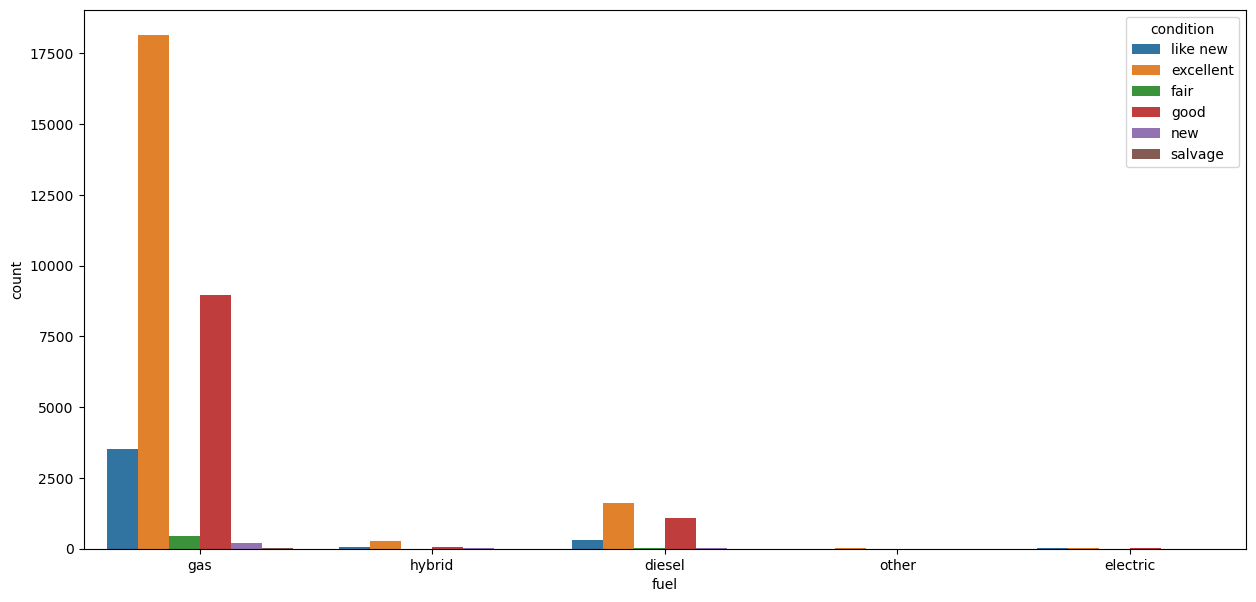

In [248]:
plt.figure(figsize= (15,7))
sns.countplot(data = df, x = df['fuel'], hue= 'condition')

<AxesSubplot: xlabel='fuel', ylabel='count'>

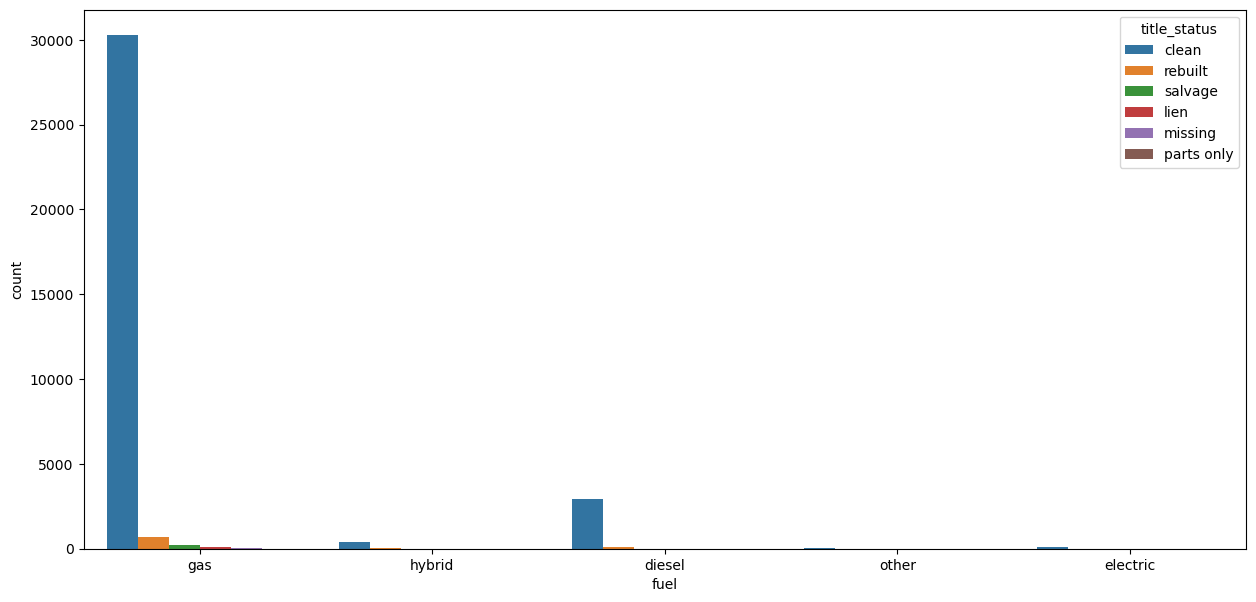

In [249]:
plt.figure(figsize= (15,7))
sns.countplot(data = df, x = df['fuel'], hue= 'title_status')

<AxesSubplot: xlabel='fuel', ylabel='count'>

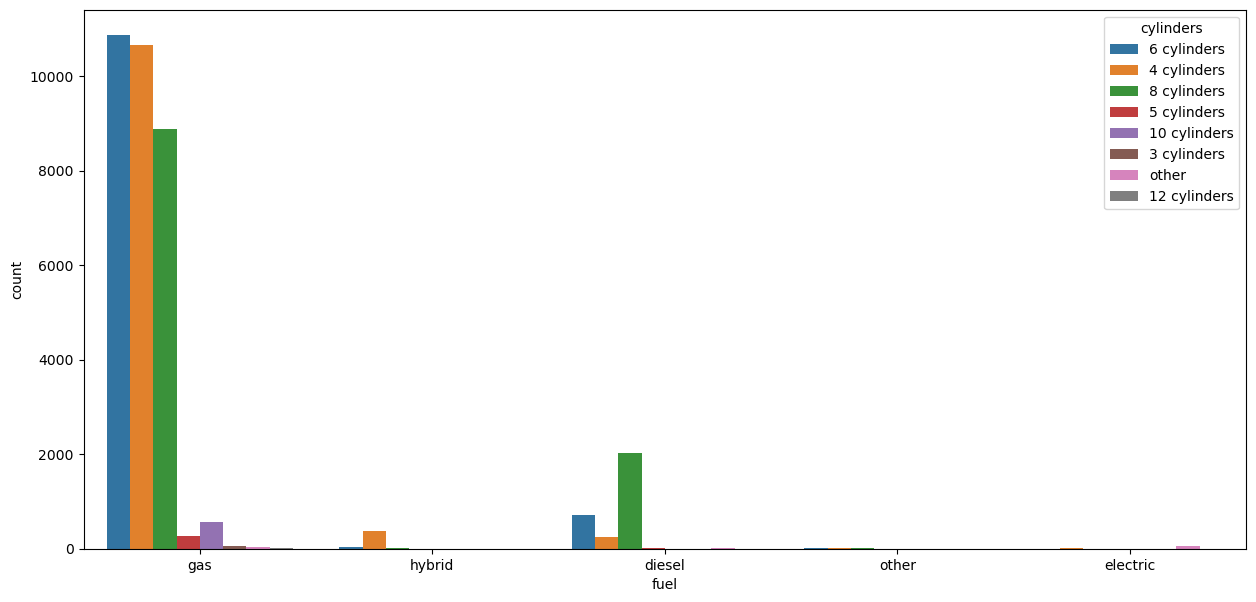

In [250]:
plt.figure(figsize= (15,7))
sns.countplot(data = df, x = df['fuel'], hue= 'cylinders')


In [251]:
df['age'] = (2023 - df['year'])
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al,5.0
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al,4.0
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al,5.0
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,21.0
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy,7.0
426792,7303114896,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy,9.0
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy,5.0
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy,26.0


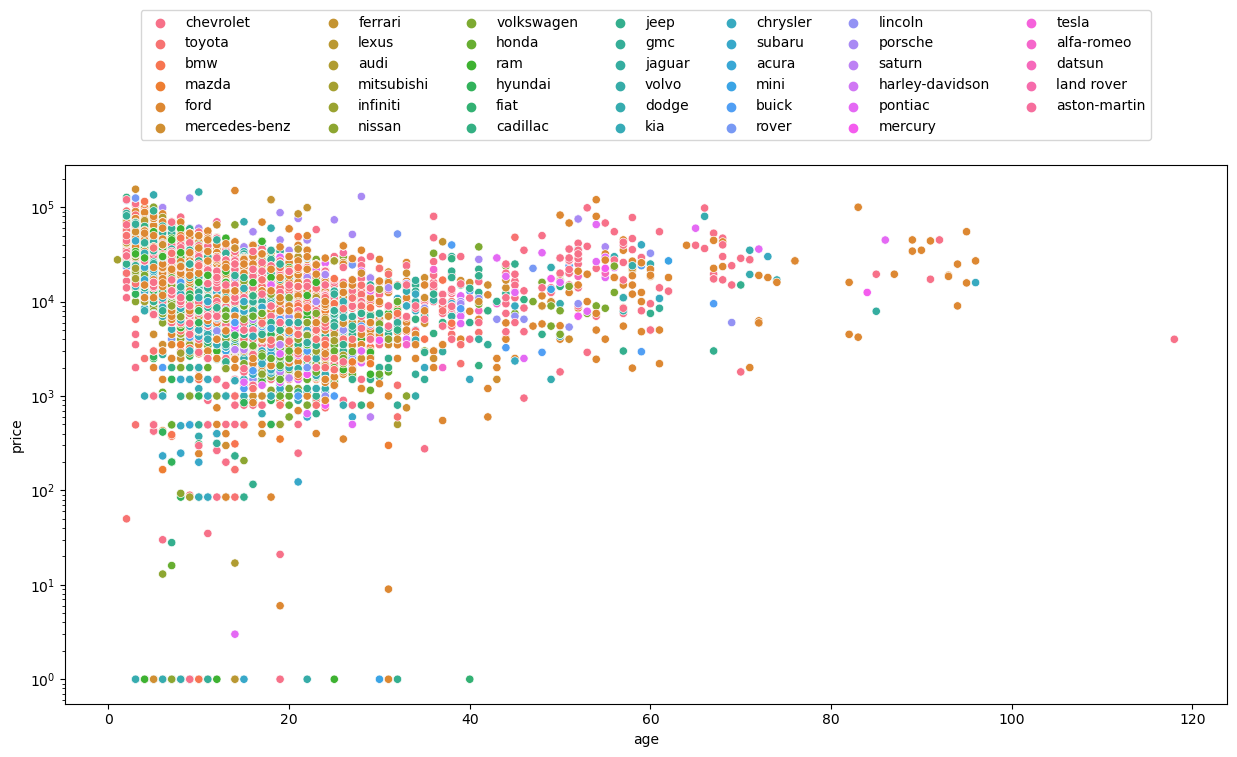

In [252]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df, x = df['age'], y= df['price'], hue = 'manufacturer')
plt.yscale('log')
plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.3),ncol=7)

<Figure size 1500x700 with 0 Axes>

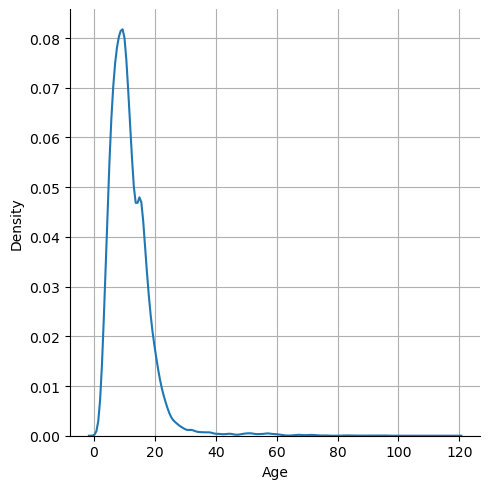

In [253]:
plt.figure(figsize= (15,7)) 
sns.displot(data = df, x='age', kind= 'kde')
plt.xlabel('Age')
plt.grid()

Modeling

· Use of multiple regression models

· Cross-validation of models

· Grid search hyperparameters

· Appropriate interpretation of coefficients in models

· Appropriate interpretation of evaluation metric

· Clear identification of evaluation metric

· Clear rationale for use of given evaluation metric

In [254]:
X = df[['region','year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','size','type','paint_color','state','age']]


In [255]:
encoder = JamesSteinEncoder()
encod_df = encoder.fit_transform(X, y)
encod_df


,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
126,0.000000,2018.0,16745.641026,20763.662753,19535.520446,15414.428740,14598.513397,68472.0,15829.839744,16091.555918,17359.752482,18662.749567,17095.886294,17601.457930,17647.733238,5.0
127,0.000000,2019.0,16745.641026,20763.662753,19535.520446,15414.428740,14598.513397,69125.0,15829.839744,16091.555918,17359.752482,18662.749567,17095.886294,17601.457930,17647.733238,4.0
128,0.000000,2018.0,16745.641026,20763.662753,19535.520446,15414.428740,14598.513397,66555.0,15829.839744,16091.555918,17359.752482,18662.749567,17095.886294,17601.457930,17647.733238,5.0
215,19517.559730,2002.0,14270.638994,3998.333878,15405.346648,11796.723484,14598.513397,155000.0,15829.839744,16091.555918,9298.126849,9911.503373,10629.503323,14165.966550,17647.733238,21.0
219,19517.559730,1995.0,14294.342237,5686.797525,4889.894347,15414.428740,14598.513397,110661.0,15829.839744,16091.555918,17359.752482,12353.620493,10629.503323,17601.457930,17647.733238,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,18850.778289,2016.0,16745.641026,10621.119651,19535.520446,11796.723484,14598.513397,61127.0,15829.839744,16091.555918,9298.126849,9911.503373,10629.503323,13724.169026,18977.690738,7.0
426792,18850.778289,2014.0,18032.594346,32999.000000,15405.346648,19314.752976,27474.631231,154642.0,15829.839744,16091.555918,19484.415635,18662.749567,19140.552289,13295.248517,18977.690738,9.0
426793,18850.778289,2018.0,16745.641026,14333.428155,15405.346648,11796.723484,14598.513397,36465.0,15829.839744,16091.555918,9298.126849,12353.620493,10629.503323,16369.877928,18977.690738,5.0
426833,18850.778289,1997.0,12954.874265,12596.021423,15441.504293,19314.752976,14598.513397,69550.0,15829.839744,16091.555918,17359.752482,9911.503373,16212.991224,17601.457930,18977.690738,26.0


In [256]:
encod_df.corr()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
region,1.000000,0.079718,0.138763,0.234829,0.044997,0.095533,0.128439,-0.034617,0.006562,0.077108,0.108288,0.163620,0.176873,0.064229,0.538331,-0.079718
year,0.079718,1.000000,0.035640,0.165578,0.205939,-0.136513,0.026834,-0.219942,0.055052,0.032807,0.003899,-0.007262,0.010679,0.122243,0.056585,-1.000000
manufacturer,0.138763,0.035640,1.000000,0.420701,0.006663,0.484659,0.285691,0.005623,0.015338,0.009414,0.403737,0.353798,0.546469,0.227793,0.079881,-0.035640
model,0.234829,0.165578,0.420701,1.000000,0.119751,0.401415,0.396435,-0.114801,0.037684,0.034358,0.408686,0.326811,0.511857,0.213040,0.137830,-0.165578
condition,0.044997,0.205939,0.006663,0.119751,1.000000,-0.029372,0.002715,-0.168657,0.072711,0.031511,-0.009284,0.015304,-0.007781,0.033533,0.054082,-0.205939
cylinders,0.095533,-0.136513,0.484659,0.401415,-0.029372,1.000000,0.239925,0.070592,0.003687,0.007117,0.516335,0.480281,0.590985,0.177535,0.050897,0.136513
fuel,0.128439,0.026834,0.285691,0.396435,0.002715,0.239925,1.000000,0.042760,0.016495,0.024047,0.204382,0.239163,0.363465,0.142350,0.048714,-0.026834
odometer,-0.034617,-0.219942,0.005623,-0.114801,-0.168657,0.070592,0.042760,1.000000,-0.003723,0.039861,0.007794,0.073233,0.026996,-0.039455,-0.028646,0.219942
title_status,0.006562,0.055052,0.015338,0.037684,0.072711,0.003687,0.016495,-0.003723,1.000000,0.011750,0.010338,0.010938,0.009992,0.016979,-0.001607,-0.055052
transmission,0.077108,0.032807,0.009414,0.034358,0.031511,0.007117,0.024047,0.039861,0.011750,1.000000,-0.079585,0.115786,0.054387,-0.001831,0.047989,-0.032807


<AxesSubplot: >

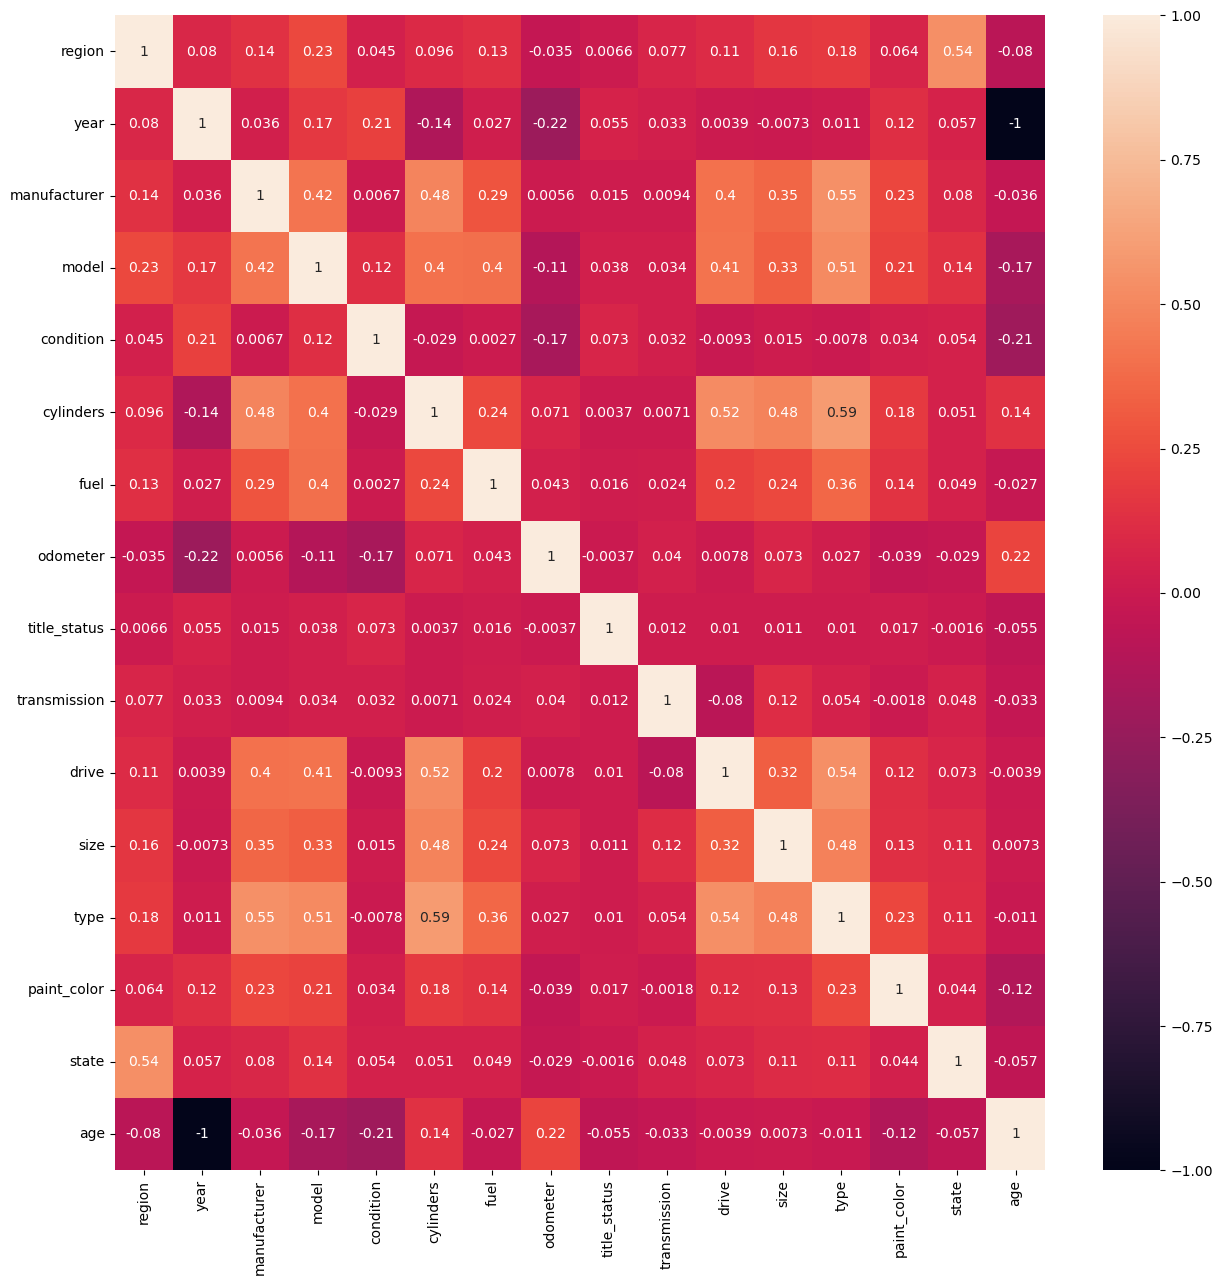

In [257]:
plt.figure(figsize=(15,15))
sns.heatmap(encod_df.corr(), annot= True)

In [258]:
pca = PCA(n_components=2)
pca.fit(encod_df)

PCA(n_components=2)

In [259]:
pca.explained_variance_ratio_

array([0.98356687, 0.00875842])

Reducing the model to two components, first component retains ~72% of the information, and second component retain close to ~21.5% of the information.
therefore, combining together, close to 10% of the information is lost . 

In [260]:
np_pca = pca.fit_transform(encod_df)
df_pca = pd.DataFrame(np_pca)
df_pca

,0,1
0,-38967.891962,4813.957062
1,-38314.931113,4818.312030
2,-40884.777121,4801.172744
3,47669.399301,-13769.705702
4,3365.522569,-9298.716416
...,...,...
34863,-46274.201878,-8406.352937
34864,47104.766764,21723.516379
34865,-70952.307626,-4982.438888
34866,-37835.910687,-2045.392232


In [261]:
df_pca.shape

(34868, 2)

identifying cluster from the above two principal components using KMeans classification

In [262]:
kmeans = KMeans(n_clusters=2, random_state= 0).fit(df_pca)
kmeans.labels_

/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Text(0, 0.5, 'PCA_2')

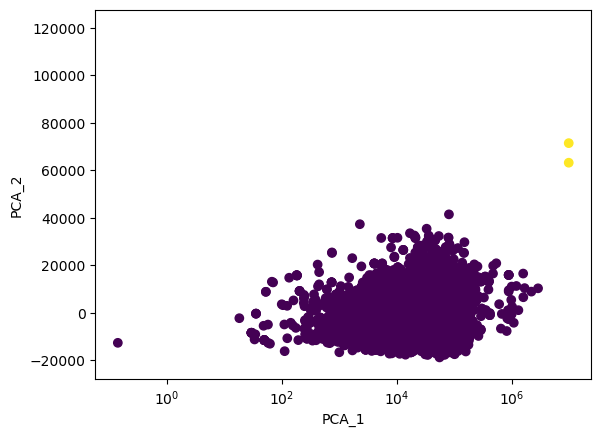

In [263]:
plt.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1], c = kmeans.labels_ )
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')

/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

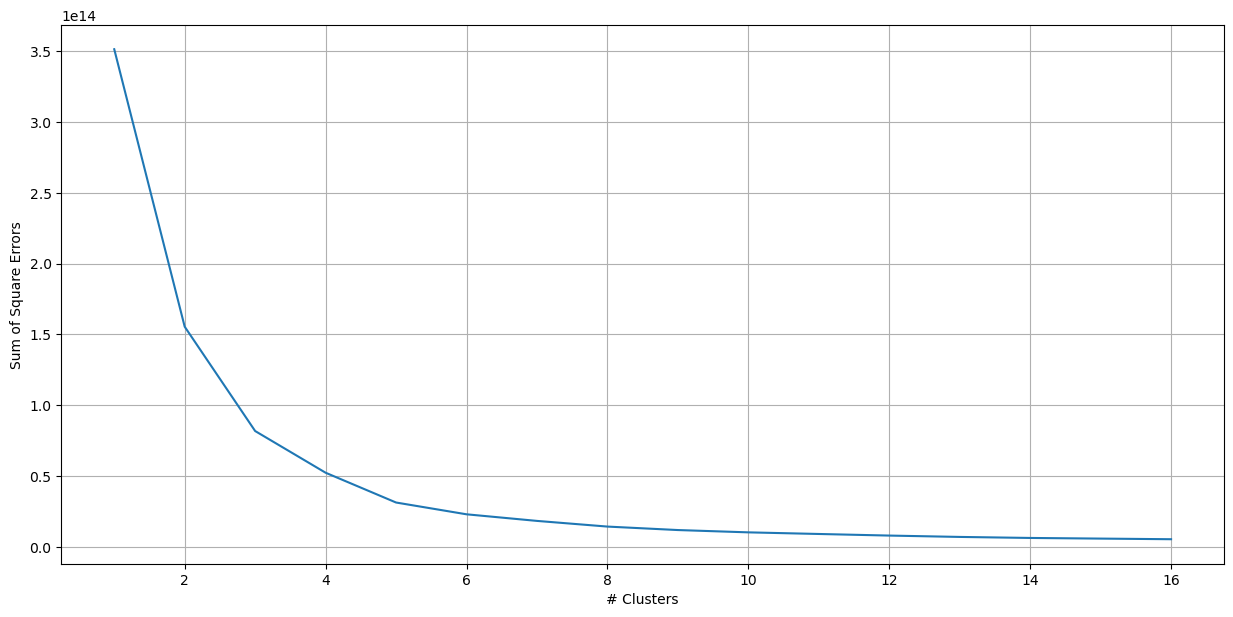

In [264]:
# sum of square errors 
sse={}
for k in range (1, 17):
    kmeans = KMeans(n_clusters= k, max_iter= 1000).fit(df_pca)
    sse[k] = kmeans.inertia_

plt.figure(figsize= (15,7))    
plt.plot (list(sse.keys()), list(sse.values()))
plt.grid()
plt.xlabel('# Clusters')
plt.ylabel('Sum of Square Errors')
plt.show()

identify elbow to find optimized number of clusters 

In [265]:
for a,b in zip(list(sse.values()), list(sse.values())[1:]):
    print(100*(a-b)/a)

55.73449005615397
47.33612608714056
35.92396544022222
40.059603843284144
26.42744983027685
20.135070432748634
21.654768286069398
16.92633074019345
13.529039831747212
10.996600164684061
12.1586693059436
11.758739691554528
10.014235183586017
7.102765774999105
7.357184683133999


Six number of Clusters provides most optimized clustering method. therefore replotting the KMeans clustering with n_clusters = 6

/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'PCA_2')

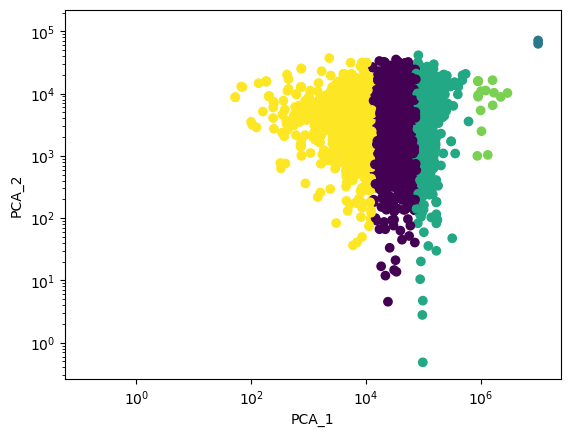

In [266]:
kmeans1 = KMeans(n_clusters=6, random_state= 0).fit(df_pca)
kmeans1.labels_

plt.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1], c = kmeans1.labels_ )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')

Findings

· Clearly stated business understanding of problem

· Clean and organized notebook with data cleaning

· Correct and concise interpretation of descriptive and inferential statistics

· Clearly stated findings in their own section with actionable items highlighted in appropriate language for a non-technical audience

· Next steps and recommendations

In [267]:

X1 = encod_df[['region','year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','size','type','paint_color','state','age']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size= 0.25, random_state= 32)
X_train

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
63384,17018.194795,2017.0,19645.994718,14636.302011,19535.520446,15414.428740,14598.513397,17110.0,15829.839744,16091.555918,19484.415635,18662.749567,19140.552289,17601.457930,15634.428081,6.0
365608,14089.148934,2008.0,14272.838327,11464.596762,15405.346648,19314.752976,14598.513397,114451.0,15829.839744,16091.555918,17359.752482,18662.749567,10629.503323,16369.877928,15675.925837,15.0
155759,14240.876365,2010.0,6032.908939,8380.408083,15441.504293,15414.428740,14598.513397,72058.0,15829.839744,16091.555918,19484.415635,12353.620493,14770.280894,17601.457930,16127.390814,13.0
383730,14023.439599,2017.0,13116.227041,10259.876616,15405.346648,15414.428740,13020.640573,86750.0,15829.839744,16091.555918,9298.126849,18662.749567,11484.495389,16369.877928,15675.925837,6.0
284772,14549.328730,2014.0,14270.638994,14146.274358,15405.346648,11796.723484,14598.513397,131000.0,15829.839744,16091.555918,19484.415635,12353.620493,14770.280894,14952.518884,14524.406416,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233151,17992.438300,2002.0,15506.889334,8555.000000,15405.346648,11796.723484,14598.513397,100617.0,15829.839744,16091.555918,17359.752482,12353.620493,16212.991224,13724.169026,17451.197527,21.0
299624,4369.827908,2006.0,15466.642106,7625.829842,15405.346648,15414.428740,14598.513397,86330.0,15829.839744,16091.555918,19484.415635,12353.620493,14770.280894,17601.457930,12997.100970,17.0
245387,17819.281813,2012.0,10344.726438,10277.202209,15405.346648,15414.428740,14598.513397,101117.0,15829.839744,16091.555918,9298.126849,12353.620493,11484.495389,17601.457930,17102.774721,11.0
115144,11271.264421,2015.0,10021.592181,10379.169371,15405.346648,11796.723484,12060.144641,70190.0,15829.839744,16091.555918,9298.126849,18662.749567,10629.503323,17601.457930,14793.610543,8.0


Building Linear Regression

In [268]:
ss = StandardScaler()
df_scaled = ss.fit_transform(encod_df)

In [269]:
X = df_scaled
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 32)

In [270]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
lin_score_tra = lin_model.score(X_train, y_train)
print( lin_score_tra)
lin_score_tst = lin_model.score(X_test, y_test) 
print(lin_score_tst)

0.6360058763964862
0.46954709593258803


Polynomial Regression

In [271]:
poly_trans = PolynomialFeatures(degree = 2, include_bias= False).fit_transform(X_train)
poly_trans

array([[ 4.79625565e-01,  8.13033576e-01,  1.53340268e+00, ...,
         6.24595210e-03,  6.42551299e-02,  6.61023596e-01],
       [-4.32566746e-01, -4.43558406e-01, -3.33825541e-01, ...,
         2.96668255e-03, -2.41594116e-02,  1.96744059e-01],
       [-3.85314295e-01, -1.64315743e-01, -3.19728745e+00, ...,
         4.52718211e-02,  3.49617496e-02,  2.69996634e-02],
       ...,
       [ 7.29107975e-01,  1.14926920e-01, -1.69888563e+00, ...,
         6.24318066e-01, -9.08081268e-02,  1.32081968e-02],
       [-1.31014010e+00,  5.33790913e-01, -1.81117818e+00, ...,
         3.32632155e-01,  3.07860019e-01,  2.84932739e-01],
       [ 1.43850470e-01, -4.43558406e-01, -1.48026451e-01, ...,
         4.68365898e-03,  3.03559233e-02,  1.96744059e-01]])

In [272]:
lr = LinearRegression()
sfs = SequentialFeatureSelector(lr,
                          n_features_to_select= 5,
                          direction= 'forward',
                          scoring= 'neg_mean_absolute_error')

In [273]:
sfs_model = sfs.fit(X1,y)

In [274]:
sfs_model.get_feature_names_out()

array(['region', 'year', 'model', 'fuel', 'odometer'], dtype=object)

In [286]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lr', LinearRegression())])
lr_train_pipe = pipe.fit(X_train, y_train)
lr_test_pipe =  pipe.score(X_test, y_test)
y_pred = pipe.predict(X_test)

test_mse_pipe = mean_squared_error(y_pred, y_test)
test_mse_pipe

94561726.11365476

In [281]:
scaled_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]).fit(X_train, y_train)
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
print(f'train MSE: {train_mse}')
print(f'test MSE: {test_mse}')

train MSE: 66294973.578733295
test MSE: 94550861.2840414


In [287]:
scaled_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Lasso())]).fit(X_train, y_train)
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
print(f'train MSE: {train_mse}')
print(f'test MSE: {test_mse}')

train MSE: 66294982.7588388
test MSE: 94526358.73198384


Summary: 

Six number of Clusters provides most optimized clustering method. therefore replotting the KMeans clustering with n_clusters = 6
Lasso regression has relatively lowest MSE for test dataset. 
top 5 featured ['region', 'year', 'model', 'fuel', 'odometer'] identified from SFS mehtod. 

Next steps: 

1. using pipline to make the script faster 
2. optimization of hyperparamters by using extensive cross-validation methods 
3. draw a MSE matrix for each regression method 
